# COVID-19 Exploratory Data Analysis
The Snapshot project

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.ensemble          import GradientBoostingRegressor
from sklearn.linear_model      import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection   import train_test_split, cross_val_score
from sklearn.cluster           import KMeans
from sklearn.decomposition     import PCA
from sklearn.preprocessing     import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics           import r2_score, mean_squared_error

In [2]:
path_to_home = '../'
datapath = path_to_home + 'data/'

In [3]:
filename = 'cov_soc_eco.csv'

df = pd.read_csv(datapath+filename)
df.head()

,state_abr,state,county,confirmed_cases,deaths,latitude,longitude,fips,percapita_income,median_household_income,...,SNAP_NPA_Participation_Persons,SNAP_All_Participation_Persons,SNAP_PA_Participation_Households,SNAP_NPA_Participation_Households,SNAP_All_Participation_Households,SNAP_All_Issuance,deaths_per_100k,cases_per_100k,jobs_per_100k,av_household_earnings_per_100k
0,WI,Wisconsin,Adams County,316.0,4.0,43.97,-89.77,55001.0,22196.0,44897.0,...,2604.0,2958.0,204.0,1462.0,1666.0,542926.0,19.782394,1562.809100,22378.832839,1.893358e+06
1,WI,Wisconsin,Ashland County,197.0,2.0,46.71,-90.56,55003.0,21115.0,38550.0,...,2121.0,2350.0,143.0,1019.0,1162.0,407986.0,12.851819,1265.904125,54671.636036,2.202699e+06
2,WI,Wisconsin,Barron County,624.0,6.0,45.42,-91.85,55005.0,23337.0,44054.0,...,4503.0,5078.0,351.0,2304.0,2655.0,868505.0,13.261427,1379.188401,53180.532225,2.631615e+06
3,WI,Wisconsin,Bayfield County,156.0,1.0,46.63,-91.18,55007.0,25377.0,44944.0,...,1106.0,1235.0,94.0,560.0,654.0,232296.0,6.650705,1037.509976,30047.885076,2.434617e+06
4,WI,Wisconsin,Brown County,11936.0,75.0,44.48,-87.99,55009.0,27787.0,53119.0,...,19848.0,22738.0,1503.0,9300.0,10803.0,4177040.0,28.350886,4511.948953,64153.140144,3.465478e+06


In [4]:
df['county_state'] = df['county'] + ', ' + df['state']
df.set_index('county_state', inplace=True)

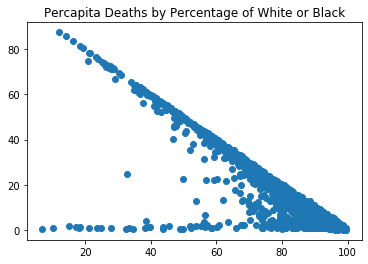

In [11]:


plt.scatter(df['pct_white']*100, df['pct_black']*100)
#plt.bar(df['deaths_per_100k'], df['pct_white']*100);
plt.title('Percapita Deaths by Percentage of White or Black');